# Brooklyn Rolling Sales Dataset

The aim of this project is to try to understand the relationship between the sale price of homes in Brooklyn and certain parameters. The goal is to build prediction models and verify the accuracy of these models as well as understand whether these models can be used in the real world.

source : http://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page

## Index 

### 1. Reading the Dataset
### 2. Cleaning up the Dataset
### 3. Exploratory Data Analysis
### 4. Modeling using Regression
### 5. Predictions
### 6. Significance of the Variables
### 7. Observations
### 8. Conclusions and Sustainability of the model


### 1. Reading the dataset

In [99]:
library('tidyverse')
library('ggmap')
library('readxl')
library(gridExtra)


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine



In [3]:
brook <‐ read_excel('C:/Users/AnuragKaushik/Downloads/rollingsales_brooklyn.xls', skip = 4)

In [10]:
names(brook)

[1] "BOROUGH"                        "NEIGHBORHOOD"                  
 [3] "BUILDING.CLASS.CATEGORY"        "TAX.CLASS.AT.PRESENT"          
 [5] "BLOCK"                          "LOT"                           
 [7] "EASE.MENT"                      "BUILDING.CLASS.AT.PRESENT"     
 [9] "ADDRESS"                        "APARTMENT.NUMBER"              
[11] "ZIP.CODE"                       "RESIDENTIAL.UNITS"             
[13] "COMMERCIAL.UNITS"               "TOTAL.UNITS"                   
[15] "LAND.SQUARE.FEET"               "GROSS.SQUARE.FEET"             
[17] "YEAR.BUILT"                     "TAX.CLASS.AT.TIME.OF.SALE"     
[19] "BUILDING.CLASS.AT.TIME.OF.SALE" "SALE.PRICE"                    
[21] "SALE.DATE"

In [12]:
head(brook)

BOROUGH,NEIGHBORHOOD,BUILDING.CLASS.CATEGORY,TAX.CLASS.AT.PRESENT,BLOCK,LOT,EASE.MENT,BUILDING.CLASS.AT.PRESENT,ADDRESS,APARTMENT.NUMBER,...,RESIDENTIAL.UNITS,COMMERCIAL.UNITS,TOTAL.UNITS,LAND.SQUARE.FEET,GROSS.SQUARE.FEET,YEAR.BUILT,TAX.CLASS.AT.TIME.OF.SALE,BUILDING.CLASS.AT.TIME.OF.SALE,SALE.PRICE,SALE.DATE
3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,55,NA,A5,28 BAY 10TH STREET,NA,...,1,0,1,1547,1428,1930,1,A5,725000,2017-06-27
3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,157,NA,A5,36 BAY 10TH STREET,NA,...,1,0,1,1547,1428,1930,1,A5,800000,2017-02-27
3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,42,NA,S1,1730 86TH STREET,NA,...,1,1,2,1342,1920,1926,1,S1,1200000,2017-03-31
3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,67,NA,S1,8642 20TH AVENUE,NA,...,1,1,2,1740,3240,1925,1,S1,1090000,2016-10-24
3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6405,49,NA,S1,1863 BATH AVENUE,NA,...,1,1,2,1172,1800,1920,1,S1,1060000,2017-04-21
3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6406,25,NA,A1,1906 BENSON AVENUE,NA,...,1,0,1,5750,2386,1901,1,A1,2050000,2017-05-16


### 2. Cleaning up the dataset

In [14]:
colnames(brook)[3] <‐ "BUILDING.CLASS.CATEGORY"
colnames(brook)[8] <‐ "BUILDING.CLASS.AT.PRESENT"
colnames(brook)[10] <‐ "APARTMENT.NUMBER"
colnames(brook)[11] <‐ "ZIP.CODE"
colnames(brook)[12] <‐ "RESIDENTIAL.UNITS"
colnames(brook)[13] <‐ "COMMERCIAL.UNITS"
colnames(brook)[17] <‐ "YEAR.BUILT"
colnames(brook)[18] <‐ "TAX.CLASS.AT.TIME.OF.SALE"
colnames(brook)[19] <‐ "BUILDING.CLASS.AT.TIME.OF.SALE"
colnames(brook)[14] <‐ "TOTAL.UNITS"
colnames(brook)[4] <‐ "TAX.CLASS.AT.PRESENT"
colnames(brook)[7] <‐ "EASE.MENT"
colnames(brook)[20] <‐ "SALE.PRICE"
colnames(brook)[21] <‐ "SALE.DATE"
colnames(brook)[16] <‐ "GROSS.SQUARE.FEET"
colnames(brook)[15] <‐ "LAND.SQUARE.FEET"

brook<‐brook[which(brook$GROSS.SQUARE.FEET!="0" & brook$LAND.SQUARE.FEET!="0"& brook$SALE.PRICE!="0"),]
brook$SALE.PRICE<‐sub("\\$","",brook$SALE.PRICE)
brook$SALE.PRICE<‐as.numeric(gsub(",","", brook$SALE.PRICE))
brook$GROSS.SQUARE.FEET<‐as.numeric(gsub(",","", brook$GROSS.SQUARE.FEET))
brook$LAND.SQUARE.FEET<‐as.numeric(gsub(",","", brook$LAND.SQUARE.FEET))

brook$SALE.PRICE<‐sub("\\$","",brook$SALE.PRICE)
brook$SALE.PRICE<‐as.numeric(gsub(",","", brook$SALE.PRICE))
brook$GROSS.SQUARE.FEET<‐as.numeric(gsub(",","", brook$GROSS.SQUARE.FEET))
brook$LAND.SQUARE.FEET<‐as.numeric(gsub(",","", brook$LAND.SQUARE.FEET))
brook$SALE.DATE<‐ as.Date(gsub("[^]:digit:]]","",brook$SALE.DATE))
brook$YEAR.BUILT<‐ as.numeric(gsub("[^]:digit:]]","",brook$YEAR.BUILT))
brook$ZIP.CODE<‐ as.character(gsub("[^]:digit:]]","",brook$ZIP.CODE))

In [15]:
names(brook)

[1] "BOROUGH"                        "NEIGHBORHOOD"                  
 [3] "BUILDING.CLASS.CATEGORY"        "TAX.CLASS.AT.PRESENT"          
 [5] "BLOCK"                          "LOT"                           
 [7] "EASE.MENT"                      "BUILDING.CLASS.AT.PRESENT"     
 [9] "ADDRESS"                        "APARTMENT.NUMBER"              
[11] "ZIP.CODE"                       "RESIDENTIAL.UNITS"             
[13] "COMMERCIAL.UNITS"               "TOTAL.UNITS"                   
[15] "LAND.SQUARE.FEET"               "GROSS.SQUARE.FEET"             
[17] "YEAR.BUILT"                     "TAX.CLASS.AT.TIME.OF.SALE"     
[19] "BUILDING.CLASS.AT.TIME.OF.SALE" "SALE.PRICE"                    
[21] "SALE.DATE"

In [16]:
dim(brook)

[1] 8522   21

### 3. Exploratory Data Analysis

#### 3.1 Does the sale price have any effect on the Gross Square feet and total Land area occupied?

Note : Since there is a considerable difference in magnitude between the different columns, we will be using the logarithmic scale to understand the patterns in data

In [17]:
coef(lm(log(SALE.PRICE) ~ log(GROSS.SQUARE.FEET), data = brook))

(Intercept) log(GROSS.SQUARE.FEET) 
             7.8619581              0.6984891

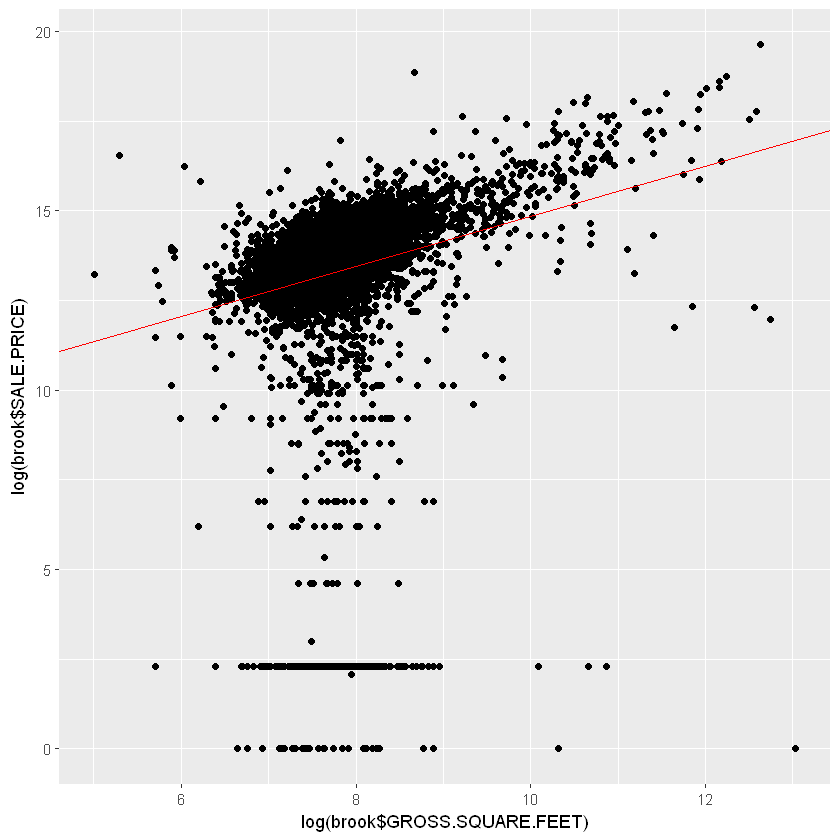

In [20]:
p1 <‐ ggplot(mapping = aes(x = log(brook$GROSS.SQUARE.FEET), y = log(brook$SALE.PRICE))) + geom_point()
p1 + geom_abline(intercept = 7.86195814380221, slope = 0.698489091488549, color = "red")

Getting rid of the 'bad' values.. Explained below

(Intercept) log(GROSS.SQUARE.FEET) 
             7.8562817              0.7489779

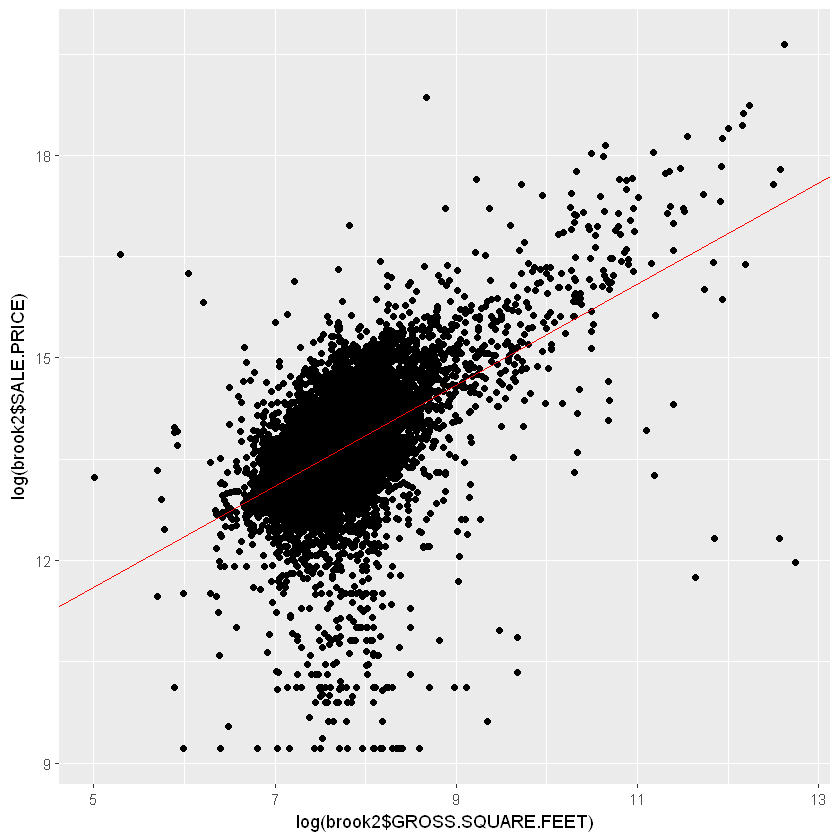

In [108]:
coef(lm(log(SALE.PRICE) ~ log(GROSS.SQUARE.FEET), data = brook2))
ggplot(mapping = aes(log(brook2$GROSS.SQUARE.FEET), log(brook2$SALE.PRICE) )) + geom_point() + geom_abline(intercept = 7.85628165356758, slope = 0.748977874063136, color = "red")

(Intercept) log(LAND.SQUARE.FEET) 
            8.4580979             0.6240041

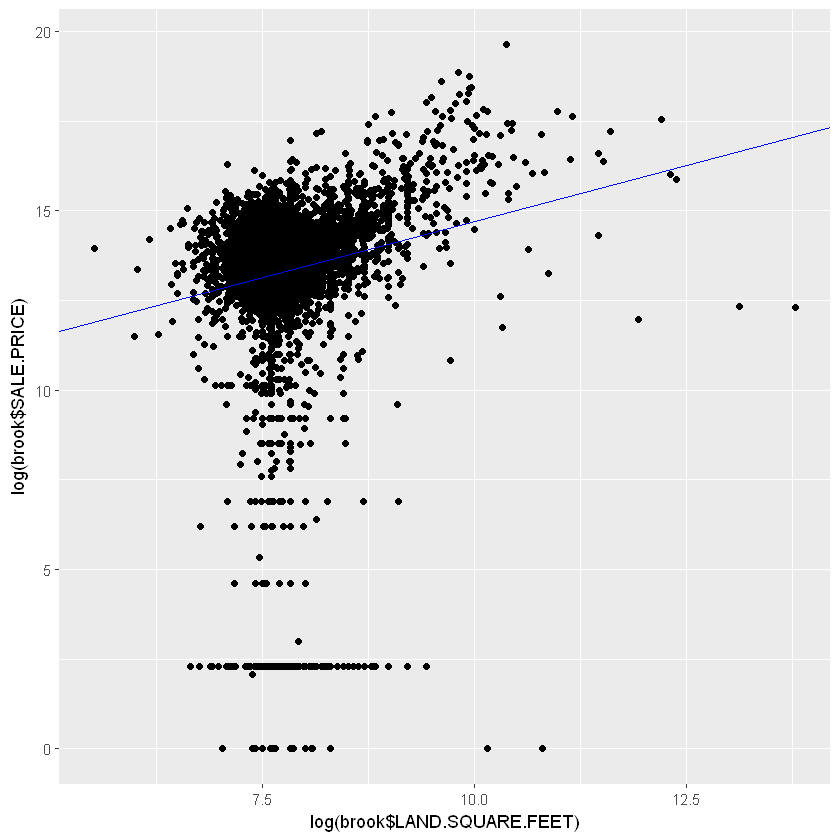

In [23]:
p1 <‐ ggplot(mapping = aes(x = log(brook$LAND.SQUARE.FEET), y = log(brook$SALE.PRICE))) + geom_point()
coef(lm(log(SALE.PRICE) ~ log(LAND.SQUARE.FEET), data = brook))
p1 + geom_abline(intercept = 8.4580978771284, slope = 0.624004097441551, color= "blue")

Getting rid of the 'bad' values.. Explained below

(Intercept) log(LAND.SQUARE.FEET) 
            8.7671860             0.6339909

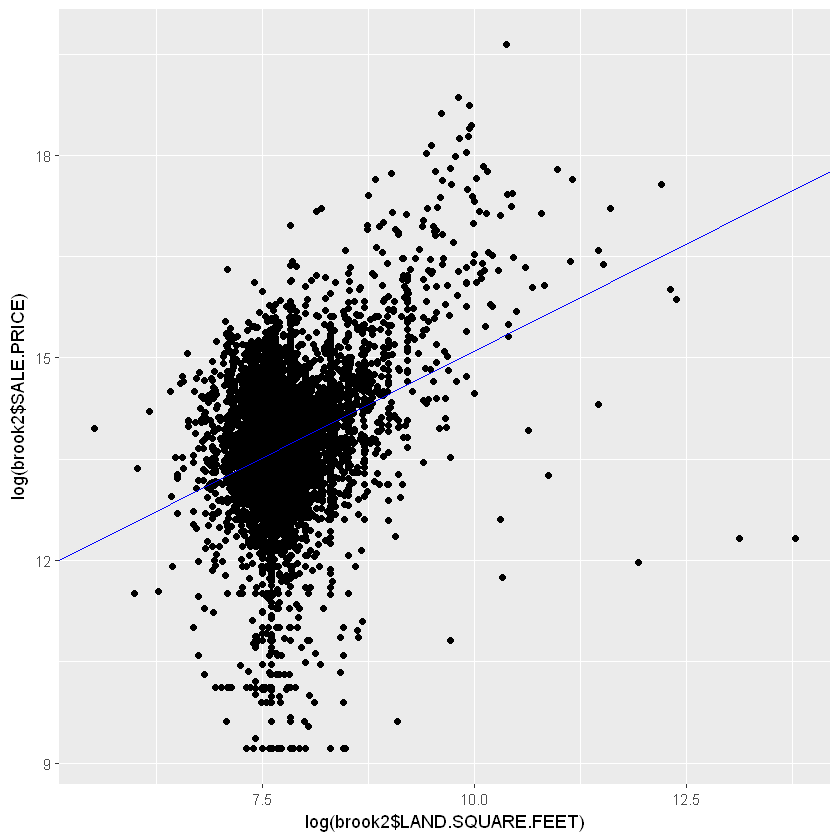

In [110]:
p1 <‐ ggplot(mapping = aes(log(brook2$LAND.SQUARE.FEET),log(brook2$SALE.PRICE) )) + geom_point()
coef(lm(log(SALE.PRICE) ~ log(LAND.SQUARE.FEET), data = brook2))
p1 + geom_abline(intercept = 8.76718596255152, slope = 0.633990949034109, color = "blue")

An almost linear relationship. 

The 'bad' values : The values at zero (i.e. log(1) ) essentially mean they are gifts or inheritance but in order to show a transaction should have occurred, the house was 'sold' for $ 1.

#### 3.2 Does the sale date have any relationship with the sale price? 

i.e Has the real estate market inflated within the span of a year?

In [25]:
coef(lm(log(SALE.PRICE) ~ SALE.DATE, data = brook))

(Intercept)     SALE.DATE 
-0.8604189657  0.0008238907

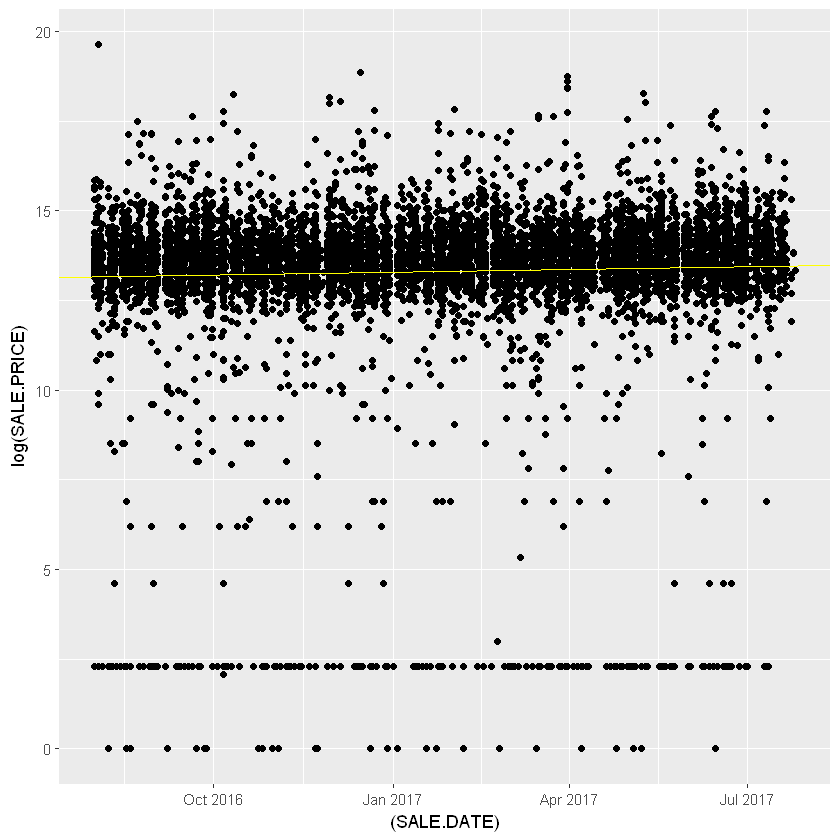

In [26]:
p <‐ ggplot(data = brook) + geom_point(mapping = aes(x = (SALE.DATE), y =log(SALE.PRICE)))
p + geom_abline(intercept = -0.860418965711823, slope = 0.000823890662193304, color = "yellow")

We see that the sale price is fairly constant across the sale date, i.e. the market hasn not inflated between
October 2012 to July 2013. The values at zero may mean that the houses were gifted. In order to gift a house,
one must show at least a $1 transaction

#### 3.3 Does the age of the house have any relevance to the sale price?

We'd assume that older houses would be more expensive and newer ones would be cheap... Lets see this for ourselves

Warning message:
"Removed 265 rows containing missing values (geom_point)."

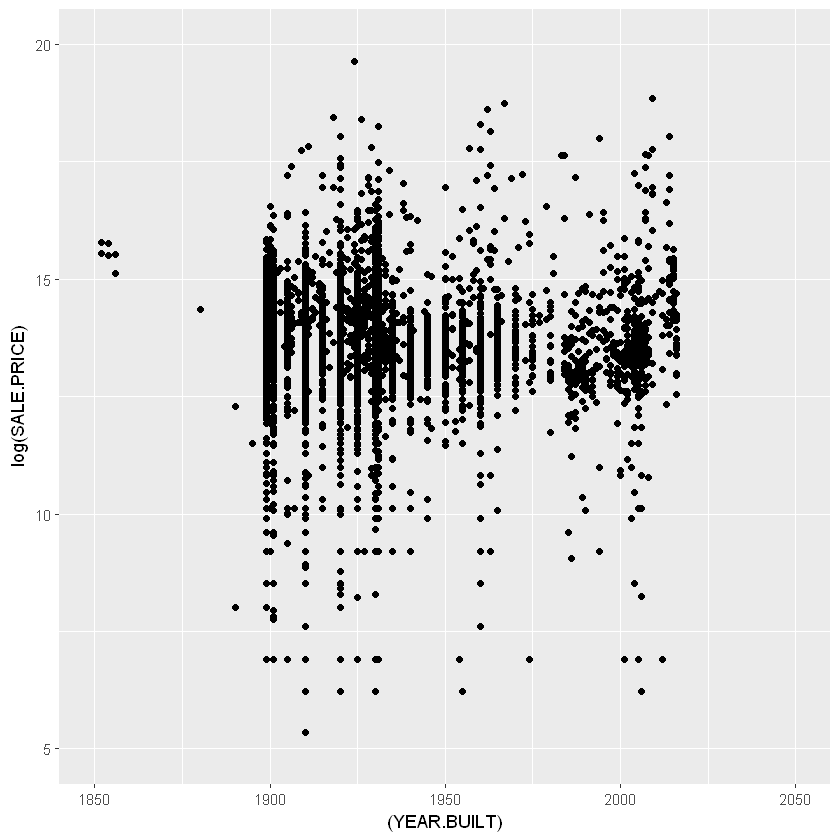

In [27]:
ggplot(data = brook) + geom_point(mapping = aes(x = (YEAR.BUILT), y = log(SALE.PRICE))) + xlim(c(1850,2050)) + ylim(c(5,20))

- There seem to be a lot of houses built between 1900-1920 and these houses have a fixed range of values.
- Same could be said of houses built after the year 2000. For the years in between, there are not too many properties for sale. 
- The high number beyond 2000 could mean that many buildings have been torn down and replaced by new ones (redevelopment).

#### 3.4 How does it look on the map?

In [29]:
brook$ADDRESSONLY <‐ 0
brook$ADDRESSONLY<‐ gsub("[,][[:print:]]*","", gsub("[ ]+","", trimws(brook$ADDRESS))) # trim has been replaced by trimws
brookadd<‐unique(data.frame(brook$ADDRESSONLY,brook$ZIP.CODE,stringsAsFactors=FALSE))
names(brookadd)<‐c("ADDRESSONLY","ZIP.CODE")
brookadd<‐brookadd[order(brookadd$ADDRESSONLY),]
duplicates<‐duplicated(brook$ADDRESSONLY)

In [31]:
minprice<‐10000 # Prices of houses only above 10,000 dollars
brook2<‐brook[which(brook$SALE.PRICE>=minprice),] # we want only those values that are higher than 10k dollars.
nval<‐dim(brook2)[1]
nval

[1] 8210

In [32]:
for(i in 1:nval) {
if(duplicates[i]==FALSE)
dupadd<‐brookadd[brookadd$duplicates,1]
}
# adding the duplicates

In [ ]:
nsample=450

addsample<‐brookadd[sample.int(dim(brookadd),size=nsample),] #Taking a limited sample

library(ggmap)

addrlist<‐paste(addsample$ADDRESSONLY, "NY", addsample$ZIP.CODE, "US", sep="") # Calling out addresses for NY only

querylist<‐geocode(addrlist) #querying the data from google maps! So cool!!

In [40]:
matched<‐(querylist$lat!=0 &&querylist$lon!=0) # select lattitude and longitudes that don't have values zero
addsample<‐cbind(addsample,querylist$lat,querylist$lon) #combining sample size, lattitude and longitude

names(addsample)<‐c("ADDRESSONLY","ZIPCODE","Latitude","Longitude") # correct the column na

adduse<‐merge(brook2,addsample) # Similar to JOIN in SQL code. No nasty business!

adduse<‐adduse[!is.na(adduse$Latitude),]

mapcoord<‐adduse[,c(2,3,24,25)]

table(mapcoord$NEIGHBORHOOD)


               BAY RIDGE       BEDFORD STUYVESANT              BENSONHURST 
                       5                       26                        2 
            BERGEN BEACH              BOERUM HILL             BOROUGH PARK 
                       5                        2                        4 
          BRIGHTON BEACH              BROWNSVILLE            BUSH TERMINAL 
                       5                        9                        1 
                BUSHWICK                 CANARSIE          CARROLL GARDENS 
                      17                       18                        4 
            CLINTON HILL              COBBLE HILL         COBBLE HILL-WEST 
                       7                        2                        2 
           CROWN HEIGHTS            CYPRESS HILLS    DOWNTOWN-FULTON FERRY 
                      13                        5                        2 
      DOWNTOWN-METROTECH            EAST NEW YORK         FLATBUSH-CENTRAL 
           

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=Brooklyn&zoom=12&size=640x640&scale=2&maptype=terrain&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Brooklyn&sensor=false
Warning message:
"Removed 37 rows containing missing values (geom_point)."

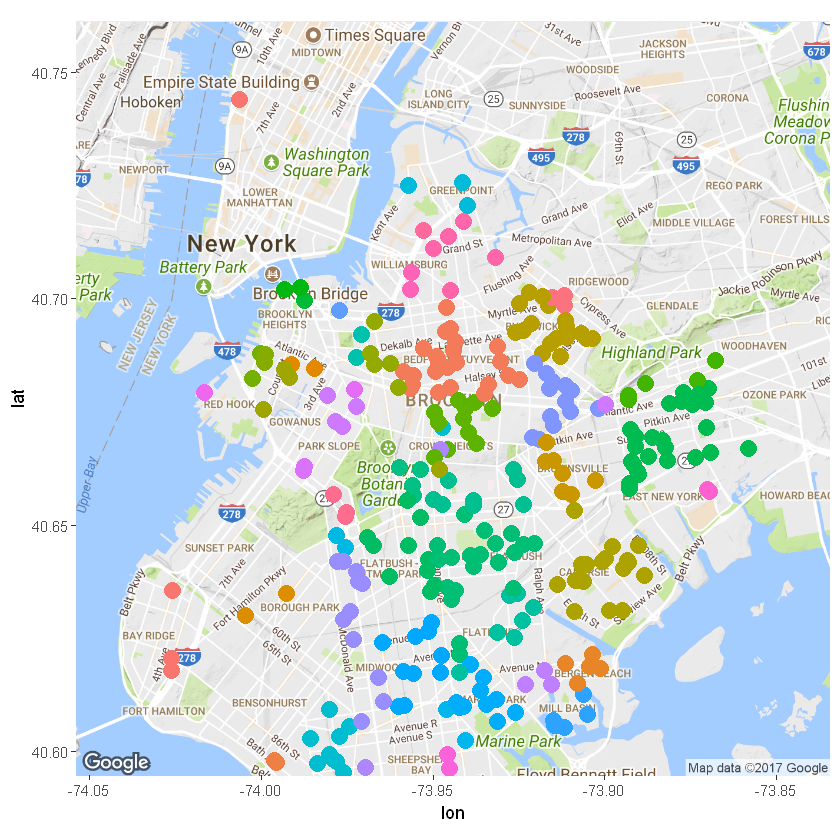

In [42]:
mapcoord$NEIGHBORHOOD <‐ as.factor(mapcoord$NEIGHBORHOOD)

map <‐ get_map(location = 'Brooklyn', zoom = 12) #Zoom 11 or 12

ggmap(map) + geom_point(aes(x = mapcoord$Longitude, y = mapcoord$Latitude, 
                            size =0.5, color=mapcoord$NEIGHBORHOOD),data = mapcoord) + theme(legend.position = "none")

#### 3.5 Where are the highest number of properties sold or listed?

[1] "BOROUGH"                        "NEIGHBORHOOD"                  
 [3] "BUILDING.CLASS.CATEGORY"        "TAX.CLASS.AT.PRESENT"          
 [5] "BLOCK"                          "LOT"                           
 [7] "EASE.MENT"                      "BUILDING.CLASS.AT.PRESENT"     
 [9] "ADDRESS"                        "APARTMENT.NUMBER"              
[11] "ZIP.CODE"                       "RESIDENTIAL.UNITS"             
[13] "COMMERCIAL.UNITS"               "TOTAL.UNITS"                   
[15] "LAND.SQUARE.FEET"               "GROSS.SQUARE.FEET"             
[17] "YEAR.BUILT"                     "TAX.CLASS.AT.TIME.OF.SALE"     
[19] "BUILDING.CLASS.AT.TIME.OF.SALE" "SALE.PRICE"                    
[21] "SALE.DATE"                      "ADDRESSONLY"

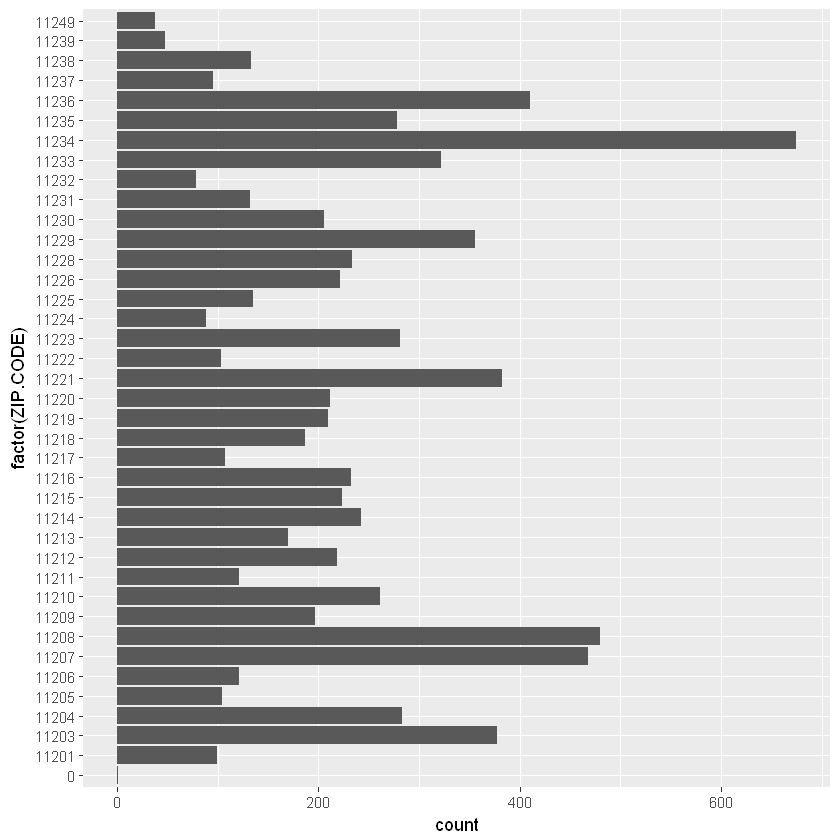

In [43]:
names(brook) 
# How many houses per zip code

bar <‐ ggplot(brook, aes(factor(ZIP.CODE)))
bar + geom_bar() + coord_flip()

This correlates with the map that Bergen Beach (zipcode 11234 has the highest number of properties for sale), i.e.
the highest density of points.

#### 3.6 How does Tax Class affect the sale price?

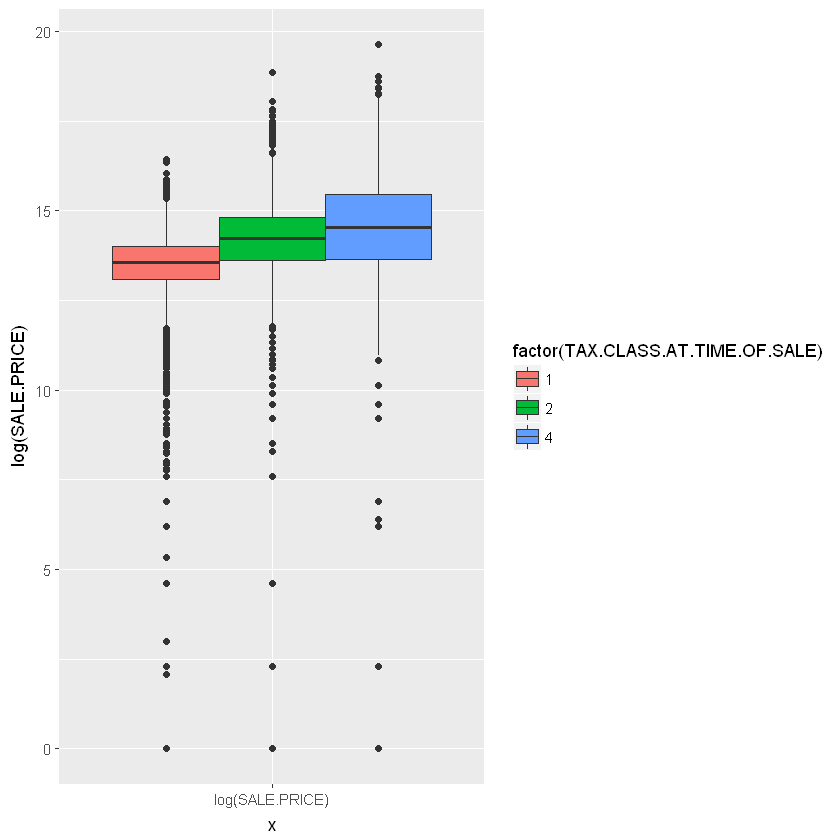

In [46]:
ggplot(brook, aes(x="log(SALE.PRICE)", y=log(SALE.PRICE)))+ geom_boxplot(aes(fill = factor(TAX.CLASS.AT.TIME.OF.SALE)))

There is a clear difference in sales prices (especially considering that we have used natural log of the
values) between the 3 taxable classes. It could be a useful factor that we can use in modeling.

### 4. Modeling using Regression

#### 4.1 Model 1 : Sale Price depends on numbers only!

In [63]:
model1 <- lm(log(SALE.PRICE) ~ 0 + RESIDENTIAL.UNITS + COMMERCIAL.UNITS 
             + TOTAL.UNITS + log(LAND.SQUARE.FEET) + log(GROSS.SQUARE.FEET) 
             + YEAR.BUILT+ (TAX.CLASS.AT.TIME.OF.SALE) + SALE.DATE, data = brook)
summary(model1)


Call:
lm(formula = log(SALE.PRICE) ~ 0 + RESIDENTIAL.UNITS + COMMERCIAL.UNITS + 
    TOTAL.UNITS + log(LAND.SQUARE.FEET) + log(GROSS.SQUARE.FEET) + 
    YEAR.BUILT + (TAX.CLASS.AT.TIME.OF.SALE) + SALE.DATE, data = brook)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.0553   0.0188   0.4389   0.7942   4.8399 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
RESIDENTIAL.UNITS          0.0121593  0.2426085   0.050  0.96003    
COMMERCIAL.UNITS           0.0215501  0.2378985   0.091  0.92782    
TOTAL.UNITS               -0.0141110  0.2428548  -0.058  0.95367    
log(LAND.SQUARE.FEET)      0.0938589  0.0599572   1.565  0.11752    
log(GROSS.SQUARE.FEET)     0.6034264  0.0522792  11.542  < 2e-16 ***
YEAR.BUILT                -0.0009577  0.0004625  -2.071  0.03840 *  
TAX.CLASS.AT.TIME.OF.SALE  0.1101291  0.0416770   2.642  0.00825 ** 
SALE.DATE                  0.0005575  0.0000567   9.833  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**'

In [136]:
# Tweaking model1 to include only the significant variables
model1 <- lm(log(SALE.PRICE) ~ 0  + log(GROSS.SQUARE.FEET) + factor(TAX.CLASS.AT.TIME.OF.SALE) + YEAR.BUILT + SALE.DATE, data = brook)

summary(model1)



Call:
lm(formula = log(SALE.PRICE) ~ 0 + log(GROSS.SQUARE.FEET) + factor(TAX.CLASS.AT.TIME.OF.SALE) + 
    YEAR.BUILT + SALE.DATE, data = brook)

Residuals:
     Min       1Q   Median       3Q      Max 
-17.0269   0.0175   0.4388   0.7999   5.0495 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
log(GROSS.SQUARE.FEET)              0.6422126  0.0437403  14.682  < 2e-16 ***
factor(TAX.CLASS.AT.TIME.OF.SALE)1 -3.1431809  4.0933293  -0.768  0.44258    
factor(TAX.CLASS.AT.TIME.OF.SALE)2 -3.0784217  4.0975125  -0.751  0.45250    
factor(TAX.CLASS.AT.TIME.OF.SALE)4 -2.7456076  4.0997036  -0.670  0.50306    
YEAR.BUILT                         -0.0008296  0.0004741  -1.750  0.08018 .  
SALE.DATE                           0.0007571  0.0002312   3.275  0.00106 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.185 on 8516 degrees of freedom
Multiple R-squared:  0.9738,	Adjusted R-squared:  0.9738 
F-sta

Model performs pretty well, lets try to improve it!

In [84]:
model_1.5 <‐ lm(log(SALE.PRICE) ~ 0 + log(LAND.SQUARE.FEET) + 
                log(GROSS.SQUARE.FEET) + factor(TAX.CLASS.AT.TIME.OF.SALE) + 
                SALE.DATE + factor(NEIGHBORHOOD) + factor (BUILDING.CLASS.CATEGORY) + factor(ZIP.CODE), data = brook)

#model_1.5$call
summary(model_1.5)


Call:
lm(formula = log(SALE.PRICE) ~ 0 + log(LAND.SQUARE.FEET) + log(GROSS.SQUARE.FEET) + 
    factor(TAX.CLASS.AT.TIME.OF.SALE) + SALE.DATE + factor(NEIGHBORHOOD) + 
    factor(BUILDING.CLASS.CATEGORY) + factor(ZIP.CODE), data = brook)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8689   0.0775   0.4277   0.7654   5.7254 

Coefficients: (3 not defined because of singularities)
                                                                          Estimate
log(LAND.SQUARE.FEET)                                                    0.2179554
log(GROSS.SQUARE.FEET)                                                   0.4618104
factor(TAX.CLASS.AT.TIME.OF.SALE)1                                      -2.0236401
factor(TAX.CLASS.AT.TIME.OF.SALE)2                                      -2.0329673
factor(TAX.CLASS.AT.TIME.OF.SALE)4                                      -2.1320569
SALE.DATE                                                                0.0007454
factor(NEIGHBORHOOD)B

#### 4.2 Model 2 : Human element of Superstition

Human societies have evolved around superstitions such as lucky and unlucky numbers depending upon the different cultures and beliefs,
Lets see whether these things affect the sales data...

In [89]:
# getting rid of NA's
brook$APARTMENT.NUMBER<‐as.numeric(gsub("","", brook$APARTMENT.NUMBER))
brook$APARTMENT.NUMBER[is.na(brook$APARTMENT.NUMBER)] <‐ 0

unique(brook$APARTMENT.NUMBER) # these are character strings with some apartment numbers and they have special values simply need to be cut down

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

[1]   0   6   3   4   5  16  53   2   8  39  28 104  15  14  35   7   9   1  43
[20]  23  20  19  18  38  12  11  32  13  24  34  54  42  36  30  40 113 100  60
[39]  48  31  21  63  10  49 135 189  45  41

In [92]:
model3<‐lm(log(brook$SALE.PRICE)~ 0 + log(brook$GROSS.SQUARE.FEET) + log(brook$LAND.SQUARE.FEET) + factor(brook$NEIGHBORHOOD) + factor(brook$BUILDING.CLASS.CATEGORY) +
           factor(brook$SALE.DATE) +factor(brook$TAX.CLASS.AT.TIME.OF.SALE) + 
           factor(brook$APARTMENT.NUMBER) )
summary(model3)


Call:
lm(formula = log(brook$SALE.PRICE) ~ 0 + log(brook$GROSS.SQUARE.FEET) + 
    log(brook$LAND.SQUARE.FEET) + factor(brook$NEIGHBORHOOD) + 
    factor(brook$BUILDING.CLASS.CATEGORY) + factor(brook$SALE.DATE) + 
    factor(brook$TAX.CLASS.AT.TIME.OF.SALE) + factor(brook$APARTMENT.NUMBER))

Residuals:
     Min       1Q   Median       3Q      Max 
-16.4561  -0.0597   0.3371   0.7503   7.4230 

Coefficients: (2 not defined because of singularities)
                                                                                Estimate
log(brook$GROSS.SQUARE.FEET)                                                   4.627e-01
log(brook$LAND.SQUARE.FEET)                                                    2.165e-01
factor(brook$NEIGHBORHOOD)BATH BEACH                                           8.196e+00
factor(brook$NEIGHBORHOOD)BAY RIDGE                                            8.483e+00
factor(brook$NEIGHBORHOOD)BEDFORD STUYVESANT                                   8.213e+00
factor(brook$

The model R squared actually improves when we take into account the apartment number factor and we can see that some apartment numbers are statistically significant.

Conclusion : 

- Thus we can see that some variables are useful while others are not. 

- The Address variable (with a lot of data munging/ transformation) can be used to further improve the model. 
- Same could be said of the Building Class variables, Block and Lots. 
    
But one must stop at a certain point and beg the question : How high of
an R squared do we really need?

### 5. Predictions

In [95]:
# running the regression on the existing dataframe
brook$log_results <‐ predict(model3, brook)
brook$PREDICTED.SALE.PRICE <‐ exp(brook$log_results)

Warning message in predict.lm(model3, brook):
"prediction from a rank-deficient fit may be misleading"

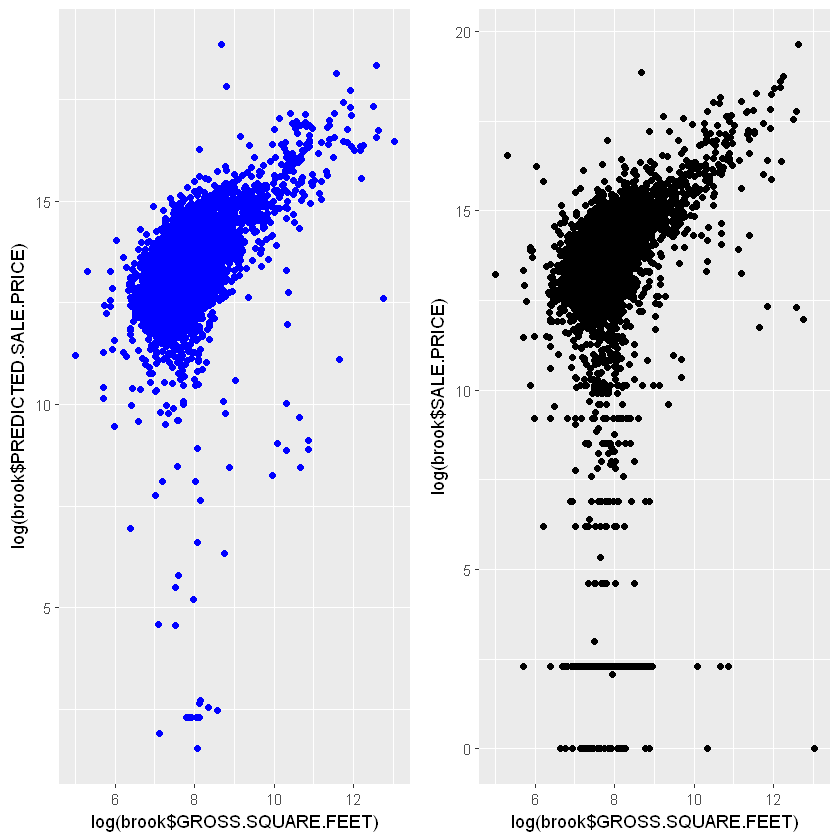

In [100]:
p1 <‐ ggplot(mapping = aes(log(brook$GROSS.SQUARE.FEET), log(brook$PREDICTED.SALE.PRICE) )) + geom_point(color = "blue")
p2 <‐ ggplot(mapping = aes(log(brook$GROSS.SQUARE.FEET), log(brook$SALE.PRICE))) + geom_point()
library(grid)
library(gridExtra)
grid.arrange(p1,p2, ncol = 2)

Because the prediction is made on the same data, there is a great chance that
many points will overlap.

So I've decided to plot the predicted vs actual values side by side for better understanding. 

Retained the original color of the observed values.

It can be seen that the predicted values closely follow the observed values atmany points especially in the central cluster.

### 6. Significance of the Variables

The R squared and Adjusted RSquared for the model (model3) are very high (of the order of 0.95) which is an indication of a good fit. 
The model can certainly be improved but it really depends on how much accuracy is needed from the model

In [101]:
# We perform the non parmetric Kolmogorov‐Smirnov test to check if the variables are significant to each other
library(stats)
ks.test(brook$GROSS.SQUARE.FEET, brook$TAX.CLASS.AT.TIME.OF.SALE)

Warning message in ks.test(brook$GROSS.SQUARE.FEET, brook$TAX.CLASS.AT.TIME.OF.SALE):
"p-value will be approximate in the presence of ties"


	Two-sample Kolmogorov-Smirnov test

data:  brook$GROSS.SQUARE.FEET and brook$TAX.CLASS.AT.TIME.OF.SALE
D = 1, p-value < 2.2e-16
alternative hypothesis: two-sided


The pvalue
of the KS test is very low, which means the null hypothesis is rejected and the alternate hypothesis
that the two variables are correlated holds true!

### 7.  Observations

- A lot of data transformation is still left such as transforming the date variable. 
- Recoding different varibles such as neighborhood, building class, etc. and feeding it back to the algorithm will produce better output.

- The exercise , in my opinion, is far from over and given a greater length of time, more algorithms and different models can be tested. I used Linear regression as that was the only one that made sense.

- Binning the Lots and Block variables accordingly and adding them to the regressor should improve the R Squared value.

### 8. Conclusions and Sustainability of the model

- The model is based on the assumption that the Sales price only depends on certain factors such as gross square feet, the size of the land, the neighborhood, type of tax that the owner needs to pay, building class, sale date etc.

- There are serious deficiencies in this model especially when applied to NYC. In the real world, real estate markets are swayed by many other factors such as reputation, vicinity to famous landmarks, inflation, etc. and many other measurable and non measurable characteristics.

- This model will fit better to a smaller city with not many famous landmarks. The model will also help to understand prices solely from raw measurable data.

- There is a lot to be improved and has been mentioned above such as binning the blocks and landmarks, clustering Zip Codes, taking into account the 'year built' variable which should provide better results.

- In conclusion, like every model, this model cannot predict the real world with 100% accuracy but it does a good job by helping us (and real estate brokers, customers, etc.) estimate the cost of buying property in Brooklyn just by looking at these measurable variables. However, due to the above mentioned tangible and intangible characteristics of cities, it is seriously wanting in predicting the results accurately.